## GRIP - The Sparks Foundation
### Data Science and Businness Analytics Intern
### Author : Dharmik Vara
### Task 1 : Prediction using Supervised ML

Problem : Predict scores of a student on the basis of number of hours he/she studies everyday.

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load Dataset

url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Check for null values

data.isna().sum()

Hours     0
Scores    0
dtype: int64

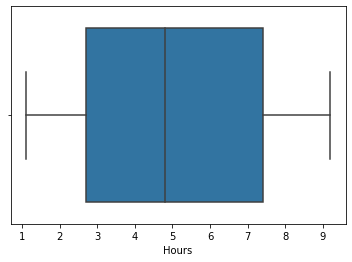

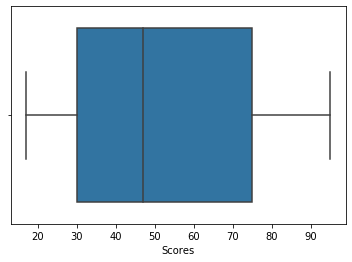

In [4]:
# Check for any outliers

sns.boxplot(data.Hours)
plt.show()
sns.boxplot(data.Scores)
plt.show()

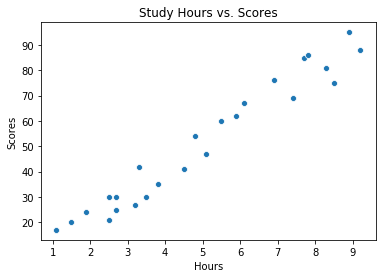

In [5]:
# Plotting points to see relation between Hours and Scores

sns.scatterplot(data.Hours, data.Scores)
plt.title('Study Hours vs. Scores')
plt.show()

In [6]:
# Bifurcating dependent and independent features

X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [7]:
# Splitting into train set and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [8]:
# Training model and predicting values

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [9]:
# Model attributes

print('Intercept :',model.intercept_)
print('Coefficient :',model.coef_)
print('Equation : ',model.coef_,'*x + ',model.intercept_,sep='')

Intercept : 2.512129298320083
Coefficient : [9.73330705]
Equation : [9.73330705]*x + 2.512129298320083


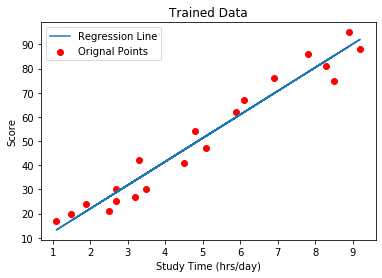

In [10]:
# Plotting relation between regression line and Trained datapoints

plt.scatter(X_train,y_train, color = 'red', label = 'Orignal Points')
plt.plot(X_train, model.predict(X_train), label = 'Regression Line')
plt.xlabel('Study Time (hrs/day)')
plt.ylabel('Score')
plt.title('Trained Data')
plt.legend()
plt.show()

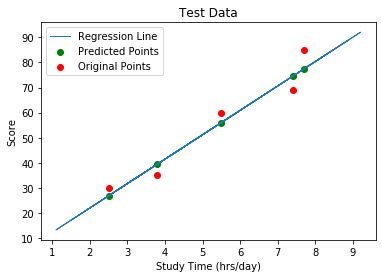

In [11]:
# Plotting accuracy of predicted datapoints

plt.scatter(X_test,pred, color = 'green', label = 'Predicted Points')
plt.scatter(X_test,y_test, color = 'red', label = 'Original Points')
plt.plot(X_train, model.predict(X_train), linewidth=1, label = 'Regression Line')
plt.xlabel('Study Time (hrs/day)')
plt.ylabel('Score')
plt.title('Test Data')
plt.legend()
plt.show()

In [12]:
# Checking difference between test datapoints and prediction

df_error = pd.DataFrame({'Y Test':y_test, 'Prediction':pred, 'Difference' : y_test-pred})
df_error

,Y Test,Prediction,Difference
0,30,26.845397,3.154603
1,85,77.458594,7.541406
2,35,39.498696,-4.498696
3,69,74.538601,-5.538601
4,60,56.045318,3.954682


In [14]:
# Model accuracy

from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
print('MAE :',mean_absolute_error(y_test, pred))
print('MSE :',mean_absolute_error(y_test, pred))
print('RMSE :',np.sqrt(mean_squared_error(y_test, pred)))
print('R2 Score :',r2_score(y_test, pred)*100)

MAE : 4.937597792467705
MSE : 4.937597792467705
RMSE : 5.164846812544612
R2 Score : 93.77551740781868


In [13]:
# Checking if the model is underfit or overfit

from sklearn.model_selection import cross_val_score
cv = cross_val_score(LinearRegression(),X_train, y_train, cv=10)
print('Max Score :',cv.max())
print('Min Score :',cv.min())

Max Score : 0.9760598838620252
Min Score : -37.067686074633826


The accuracy is little less than maximum cross validation score, so the model is niether overfit now underfit.

In [15]:
# Predciting with an unknown value
hours = [9.25]
own_pred = model.predict([hours])
print("No of Hours = {}".format(hours[0]))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.5452195402996
